In [11]:
## Import librarys

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Run project modules
%run ./src/__init__.py

In [12]:
## Some playlist id

playlist_id= '0JcCtpR2cHbmy70zwa81WV'

In [13]:
df_playlist = playlist_features(playlist_id)

In [14]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           213 non-null    object 
 1   track_name         213 non-null    object 
 2   duration_ms        213 non-null    int64  
 3   explicit           213 non-null    bool   
 4   track_popularity   213 non-null    int64  
 5   acousticness       213 non-null    float64
 6   danceability       213 non-null    float64
 7   energy             213 non-null    float64
 8   instrumentalness   213 non-null    float64
 9   key                213 non-null    int64  
 10  liveness           213 non-null    float64
 11  loudness           213 non-null    float64
 12  mode               213 non-null    int64  
 13  speechiness        213 non-null    float64
 14  tempo              213 non-null    float64
 15  time_signature     213 non-null    int64  
 16  valence            213 non

In [15]:
df_playlist['release_year'] = df_playlist['release_date'].str[:4].astype(int)

## Numeric features description

In [16]:
df_playlist.describe()

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_popularity,artist_followers,release_year
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000
mean,234071.981221,44.934272,0.172209,0.513108,0.712203,0.070757,5.046948,0.180475,-7.300221,0.680751,0.056045,127.395235,3.938967,0.579708,73.004695,7.375321e+06,1997.220657
std,66800.282172,29.317961,0.254792,0.141860,0.209846,0.186384,3.722402,0.137848,3.480022,0.467284,0.041814,30.236606,0.293053,0.220786,11.637812,9.531934e+06,13.373204
min,110093.000000,0.000000,0.000006,0.107000,0.042000,0.000000,0.000000,0.013600,-22.231000,0.000000,0.023500,70.843000,1.000000,0.066900,2.000000,4.100000e+01,1963.000000
25%,189226.000000,17.000000,0.005090,0.409000,0.558000,0.000002,2.000000,0.092600,-9.224000,0.000000,0.033600,103.183000,4.000000,0.400000,65.000000,8.977570e+05,1991.000000
50%,226240.000000,53.000000,0.040000,0.523000,0.769000,0.000179,4.000000,0.134000,-6.558000,1.000000,0.042100,125.412000,4.000000,0.592000,76.000000,3.338891e+06,2001.000000
75%,265640.000000,70.000000,0.212000,0.611000,0.889000,0.011600,9.000000,0.222000,-4.860000,1.000000,0.059200,152.510000,4.000000,0.754000,82.000000,1.112128e+07,2007.000000
max,517125.000000,88.000000,0.944000,0.929000,0.993000,0.882000,11.000000,0.854000,-1.746000,1.000000,0.319000,203.243000,4.000000,0.968000,92.000000,3.912350e+07,2018.000000


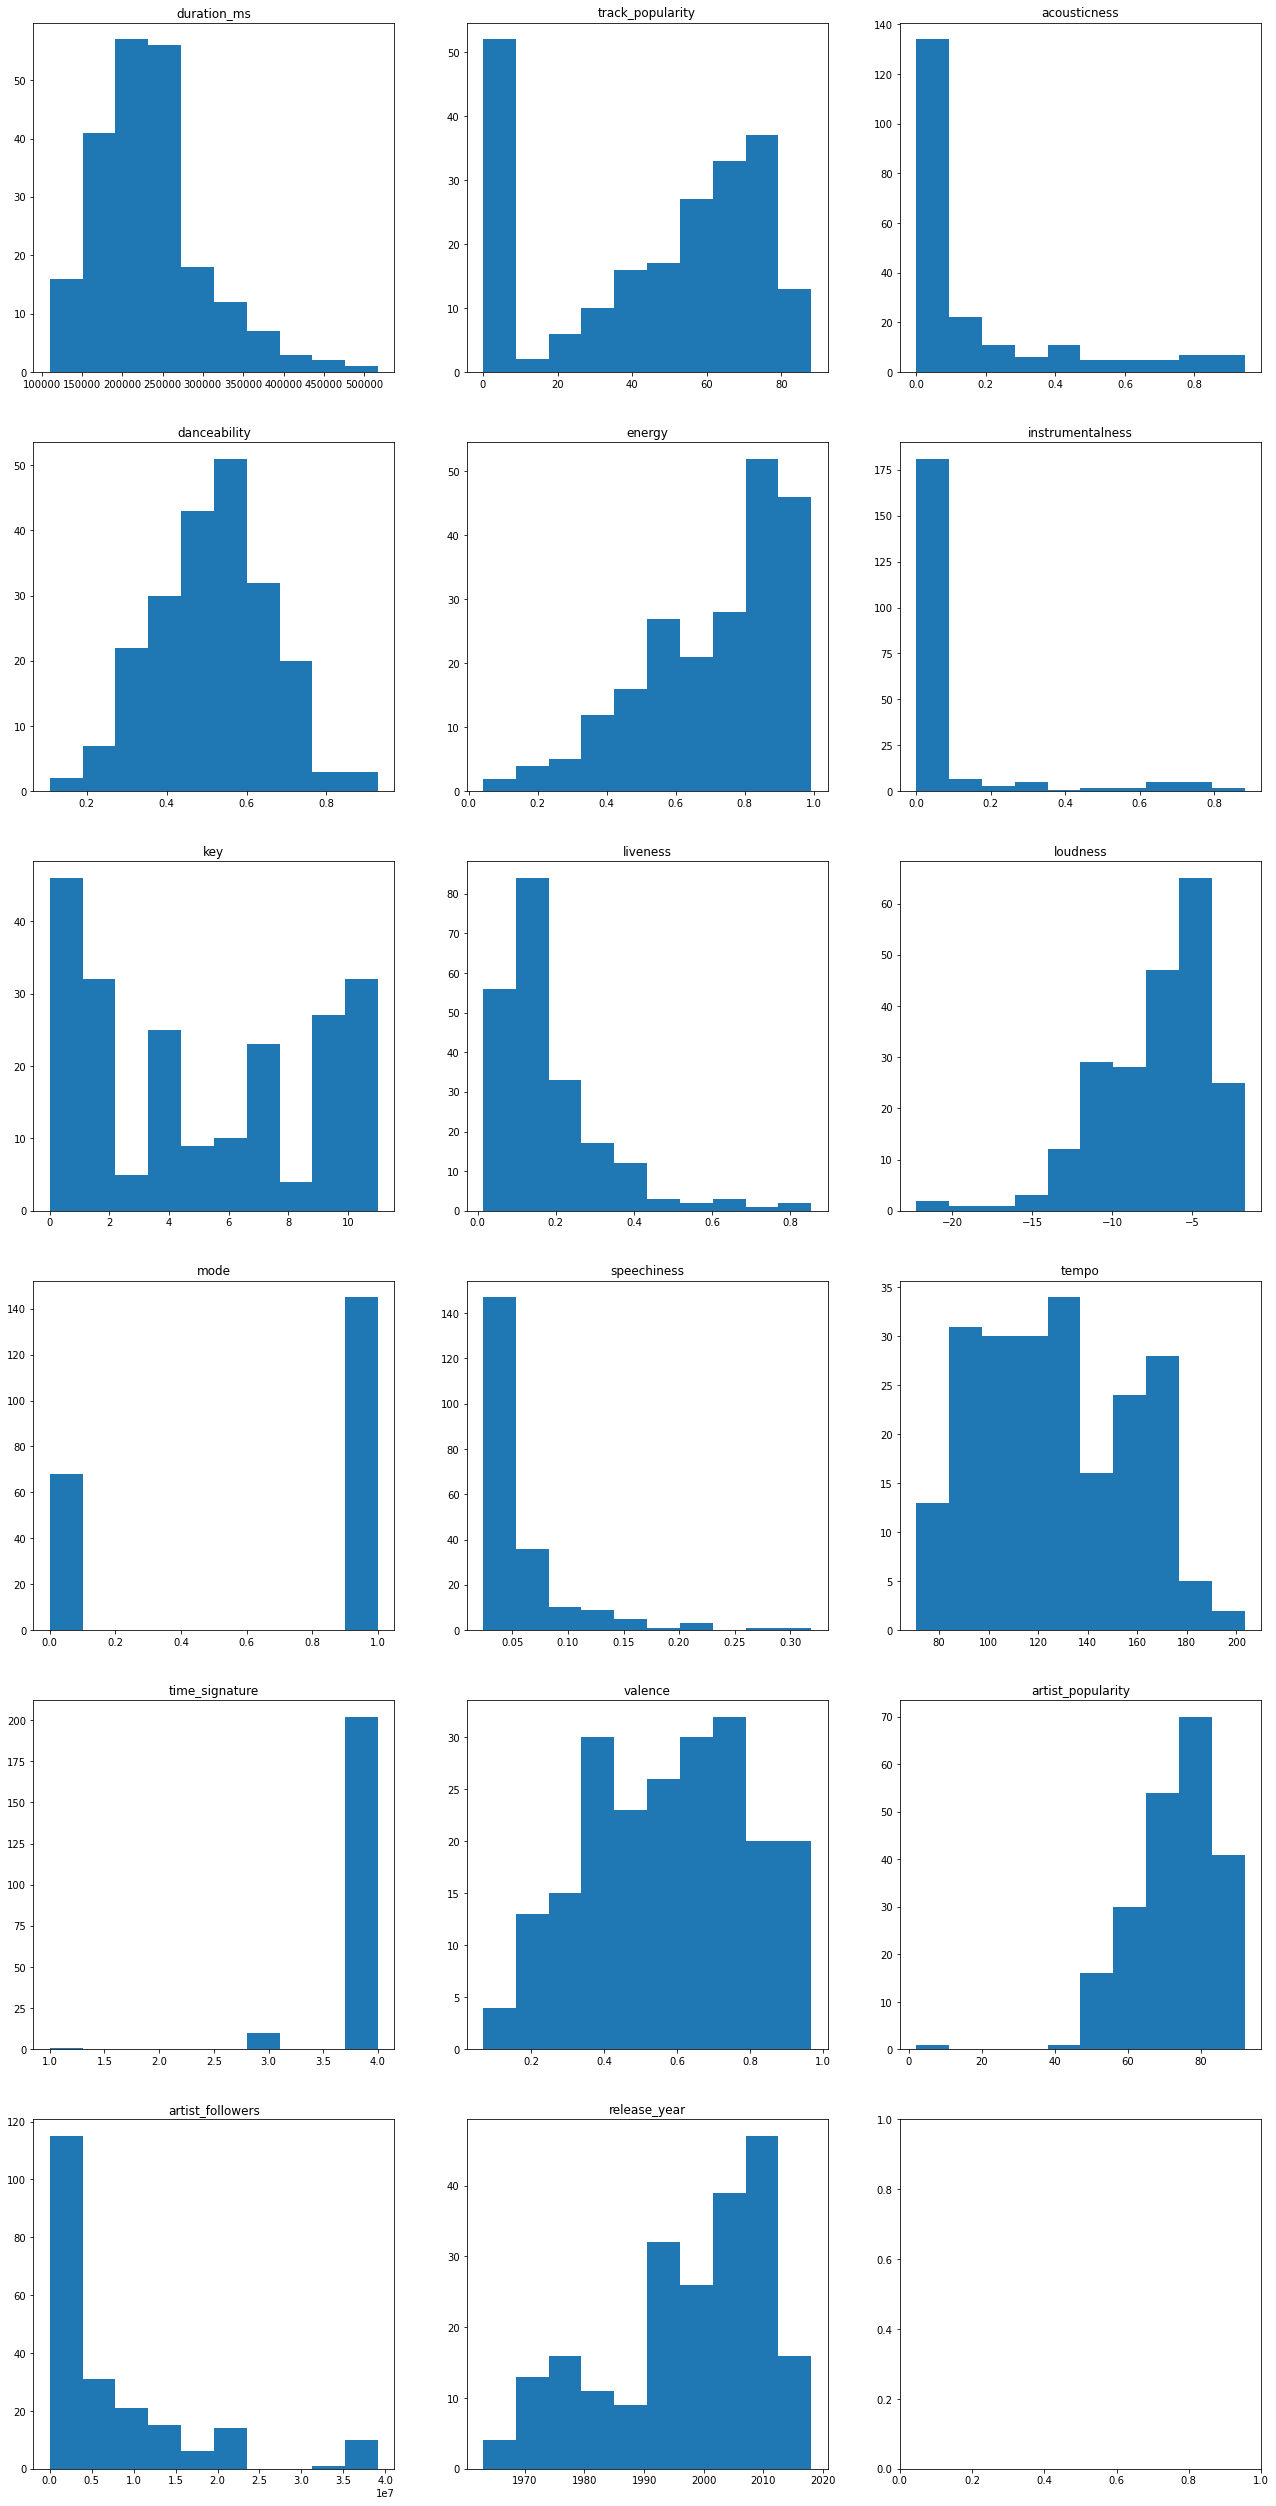

In [17]:
## Histograms of the numeric features

plt.rcParams['figure.figsize'] = [22, 45]

fig, axs = plt.subplots(6, 3)

numeric_features = df_playlist.select_dtypes(include=np.number).columns
feature = 0

for i in range(6):
    for j in range(3):
        try:
            axs[i,j].hist(df_playlist[numeric_features[feature]])
            axs[i,j].set_title(numeric_features[feature])
            feature += 1
        except:
            pass


## Categorical features description

In [18]:
df_categorical = df_playlist[['artist_name','artist_genres','album_name','album_type']]

In [19]:
## Artists description

total_artists = df_categorical['artist_name'].nunique()

print(f'There are {total_artists} different artists in the playlist')

total_show = min(20,total_artists)

print('\nPrincipal artists:')

df_categorical['artist_name'].value_counts()[:total_show]

There are 105 different artists in the playlist

Principal artists:


Queen                 10
Morphine               8
Green Day              7
Foo Fighters           7
The Beatles            7
The Cure               6
Beirut                 6
Iggy Pop               6
Led Zeppelin           6
The Strokes            6
Oasis                  5
Pink Floyd             4
David Bowie            4
Nirvana                4
Metallica              4
Arctic Monkeys         4
El Cuarteto De Nos     3
Kings of Leon          3
Travis                 3
Los Bunkers            3
Name: artist_name, dtype: int64

In [20]:
## Genres description

all_genres = df_categorical['artist_genres'].apply(pd.Series).stack().reset_index(drop=True)

total_genres = all_genres.nunique()

print(f'There are {total_genres} different genres in the playlist')

total_show = min(20,total_genres)

print('\nPrincipal genres:')

all_genres.value_counts()[:total_show]

There are 171 different genres in the playlist

Principal genres:


rock                 128
permanent wave        69
classic rock          51
alternative rock      43
modern rock           39
rock en espanol       25
latin rock            25
latin alternative     24
punk                  21
glam rock             20
indie rock            18
album rock            17
new wave              16
hard rock             16
garage rock           15
psychedelic rock      15
blues rock            14
alternative metal     13
indie pop             13
beatlesque            12
dtype: int64

In [22]:
## Albums description

total_albums = df_categorical['album_name'].nunique()

print(f'There are {total_albums} different albums in the playlist')

total_show = min(20,total_albums)

print('\nPrincipal albums:')

df_categorical['album_name'].value_counts()[:total_show]

There are 178 different albums in the playlist

Principal albums:


Dookie                                                             5
Good                                                               3
The Rip Tide                                                       3
Jazz                                                               3
Cure for Pain                                                      3
Mothership (Remastered)                                            3
(What's The Story) Morning Glory? (Deluxe Edition) [Remastered]    2
Disintegration (Deluxe Edition)                                    2
Greatest Hits                                                      2
Metallica                                                          2
...And Out Come The Wolves                                         2
Whatever People Say I Am, That's What I'm Not                      2
Room On Fire                                                       2
Agila                                                              2
Only By The Night                 

In [23]:
## Album type count

df_categorical['album_type'].value_counts()

album    213
Name: album_type, dtype: int64